In [138]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd

In [139]:
from typing import Tuple, List, Dict


def get_simulation_files() -> Tuple[Dict[str, List[str]], Dict[str, List[str]], Dict[str, List[str]]]:
    def add_file(dict : Dict, key: str, value: str) -> None:
        if key in dict:
            dict[key].append(value)
        else:
            dict[key] = [value]

    avg_degree, degree_distribution, giant_component = {}, {}, {}
    for file in os.listdir():
        if file.endswith(".txt"):
            [filename, _] = file.split("(")
            if filename.endswith("avg_degree"):
                add_file(avg_degree, filename, file)
            elif filename.endswith("degree_distribution"):
                add_file(degree_distribution, filename, file)
            elif filename.endswith("giant_component"):
                add_file(giant_component, filename, file)

    return avg_degree, degree_distribution, giant_component


def process_prefix(file_name: str) -> Tuple[int, int, float, float]:
    def get_fraction(fraction_str: str) -> float:
        [num, den] = fraction_str.split("d")
        return float(num) / float(den)

    file_info = file_name.split("_")
    num_nodes = int(file_info[1])
    steps = int(file_info[3])
    alpha = get_fraction(file_info[5])
    r = get_fraction(file_info[7])

    return num_nodes, steps, alpha, r


In [143]:
files = list(get_simulation_files()[0].values())[0]

values = []
for file in files:
    df = pd.read_csv(file)
    [min_step] = df.keys()
    values.append(df[min_step])

df_concat = pd.concat(values)
file_means = df_concat.groupby(level=0)
print(file_means.std().values)


[0.         0.         0.         ... 0.01092483 0.01095719 0.01081351]


## Plot \<K\>(t)

In [14]:
from typing import Callable


def pk_builder(alpha, r) -> Callable[[int, float], float]:
    alphadr = alpha / r

    def c(t):
        alphadr * (1 - np.exp(-r * t))

    def Q(k, c):
        np.euler_gamma

    return lambda k, t: r / alpha * (1 - Q(k + 1, c(t))) + np.exp(-c(t) - r * t)


def expected_pk_builder(alpha, r) -> Callable[[float], float]:
    alphadr = alpha / r

    return lambda t: alphadr / 2 * (1 - np.exp(-2 * r * t))

In [181]:
def plot_avg_degree(prefix: str, file_list: List[str]) -> None:
    num_nodes, num_steps, alpha, r = process_prefix(prefix)
    print(num_nodes, num_steps, alpha, r)

    min_step: int = 1
    values = []
    for file in file_list:
        df = pd.read_csv(file)
        [min_step] = df.keys()
        values.append(df[min_step])

    grouped_files = pd.concat(values).groupby(level=0)
    mean, std = grouped_files.mean().values, grouped_files.std().values

    expected_pk = expected_pk_builder(alpha=alpha, r=r)

    x_values = np.arange(num_steps) * float(min_step) / float(num_nodes)
    plt.title("Nodes: " + str(num_nodes) + " Steps: " + str(num_steps))
    plt.errorbar(x_values, mean, yerr=std)
    plt.plot(x_values, list(map(expected_pk, x_values)))
    plt.legend(
        [
            "Theory - alpha = " + str(alpha) + ", r = " + str(r),
            "Simul. - alpha = " + str(alpha) + ", r = " + str(r),
        ]
    )
    plt.show()


10000 50000 1.0 0.5


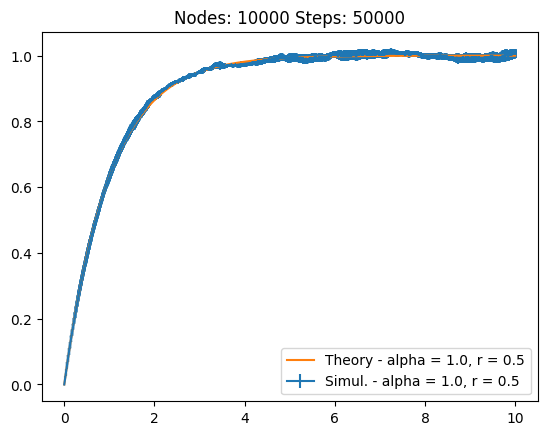

25000 50000 1.0 0.5


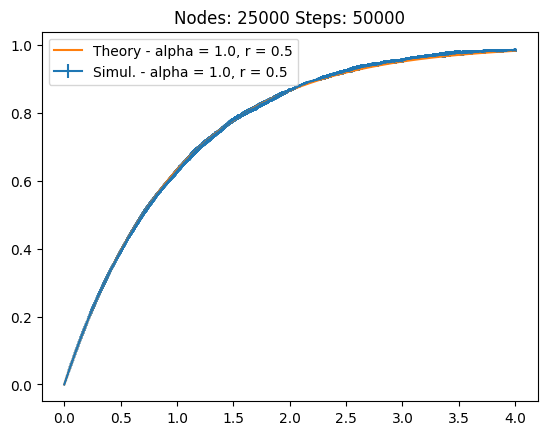

50000 50000 1.0 0.5


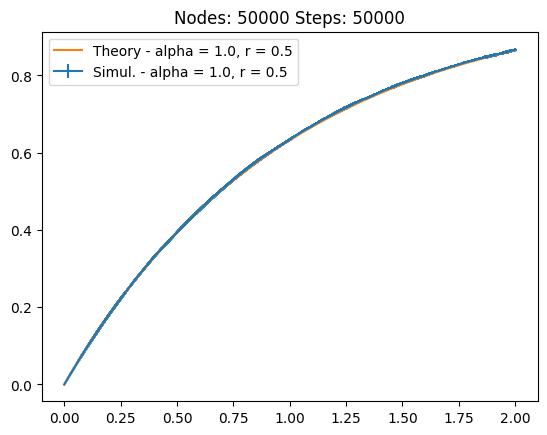

In [182]:
for prefix, file_list in get_simulation_files()[0].items():
    plot_avg_degree(prefix=prefix, file_list=file_list)


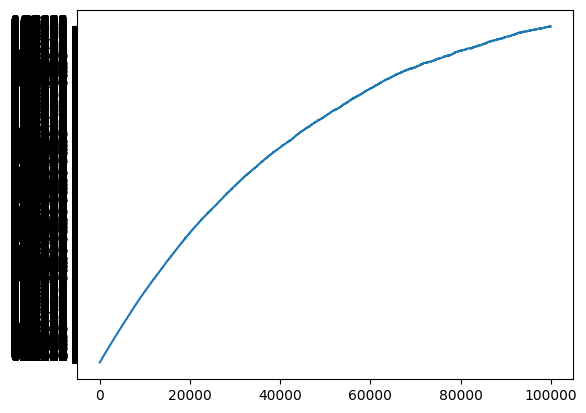

In [2]:
with open("nodes_50000_steps_50000_alpha_1d1_r_1d2.txt") as f:
    lines = f.readlines()
    spacing = int(lines[0])
    lines = lines[1:]
    x_axis = np.arange(len(lines)) * spacing / len(lines)
    plt.plot(x_axis, lines)


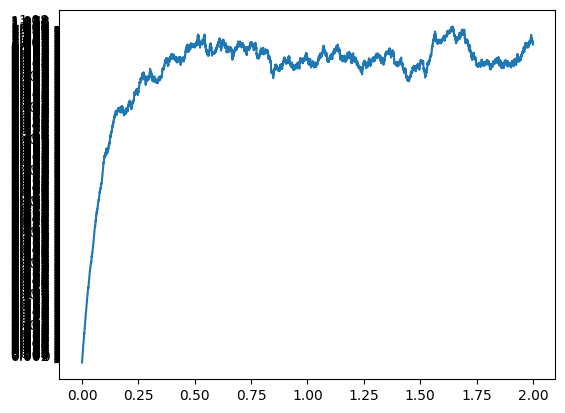

In [2]:
with open("nodes_1000_steps_10000_alpha_1d1_r_1d2.txt") as f:
    lines = f.readlines()
    spacing = int(lines[0])
    lines = lines[1:]
    x_axis = np.arange(len(lines)) * spacing / len(lines)
    plt.plot(x_axis, lines)
